In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
df = pd.read_csv('data.csv')

In [37]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:xlabel='price', ylabel='Count'>

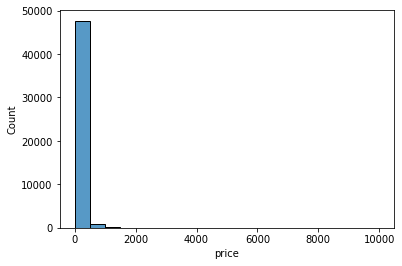

In [38]:
sns.histplot(df.price, bins=20)

In [39]:
max_price = df['price'].max()

<AxesSubplot:xlabel='price', ylabel='Count'>

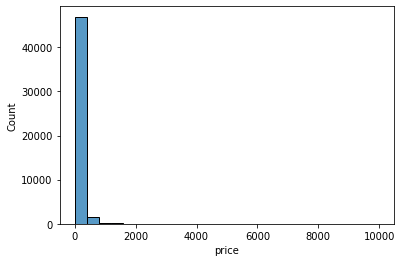

In [40]:
sns.histplot(df.price[df.price <= max_price], bins=25)

In [41]:
price_logs = np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

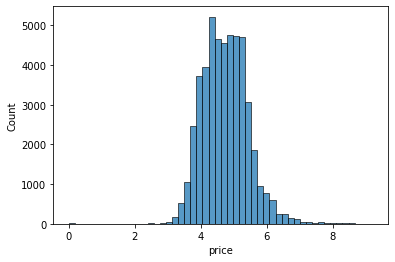

In [42]:
sns.histplot(price_logs, bins=50)

In [43]:
base = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']
df = df[base]
base_without_price = base.copy()
base_without_price.remove('price')
df[base].head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


# **Question 1**

In [44]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **Question 2**

In [45]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [46]:
length_df = len(df)
idx = np.arange(length_df)
n_val = int(length_df * 0.2)
n_test = int(length_df * 0.2)
n_train = length_df - n_val - n_test

In [47]:
def get_y_data(df_train, df_val, df_test):
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    return y_train, y_val, y_test

In [48]:
def get_split_data(num):
    np.random.seed(num)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    return df_train, df_val, df_test

In [49]:
df_train, df_val, df_test = get_split_data(42)
y_train, y_val, y_test = get_y_data(df_train, df_val, df_test)

In [50]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [51]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [52]:
def prepare_X(df, zero=True):
    df_num = df[base_without_price]
    for col in base_without_price:
        if zero:
            df_num[col] = df_num[col].fillna(0)
        else:
            df_num[col] = df_num[col].fillna(df_num[col].mean())
    X = df_num.values
    return X

# Question 3

In [53]:
# Missing column with Zero
X_train_0 = prepare_X(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val_0 = prepare_X(df_val)
y_pred_0 = w0 + X_val_0.dot(w)
score_for_0 = rmse(y_val, y_pred_0)
round(score_for_0, 2)


0.64

In [54]:
# Missing column with its mean
X_train_mean = prepare_X(df_train,  False)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val, False)
y_pred_mean = w0 + X_val_mean.dot(w)
score_for_mean = rmse(y_val, y_pred_mean)
round(score_for_mean, 2)

0.64

# Question 4

In [55]:
def train_linear_regression_with_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [56]:
regularization_periods = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 156]

In [57]:
na_column_name = 'reviews_per_month'
for r in regularization_periods:
    X_train_0 = prepare_X(df_train, na_column_name)
    w0, w = train_linear_regression_with_reg(X_train_0, y_train, r)

    X_val_0 = prepare_X(df_val, na_column_name)
    y_pred_0 = w0 + X_val_0.dot(w)
    score_for_0 = rmse(y_val, y_pred_0)
    print(f"R={r} and its Score is {round(score_for_0, 2)}")

R=0 and its Score is 0.64
R=1e-06 and its Score is 0.64
R=0.0001 and its Score is 0.64
R=0.001 and its Score is 0.64
R=0.01 and its Score is 0.66
R=0.1 and its Score is 0.68
R=1 and its Score is 0.68
R=5 and its Score is 0.68
R=10 and its Score is 0.68
R=100 and its Score is 0.68
R=156 and its Score is 0.68


# Question 5

In [58]:
score_list = []
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seed_values:
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train_0 = prepare_X(df_train)
    w0, w = train_linear_regression(X_train_0, y_train)

    X_val_0 = prepare_X(df_val)
    y_pred_0 = w0 + X_val_0.dot(w)
    score_for_0 = rmse(y_val, y_pred_0)
    score_list.append(score_for_0)
round(np.std(score_list), 3)

0.006

# Question 6

In [59]:
df_train, df_val, df_test = get_split_data(9)
y_train, y_val, y_test = get_y_data(df_train, df_val, df_test)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

X_train_full = prepare_X(df_full_train)
w0, w = train_linear_regression_with_reg(X_train_full, y_full_train)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score_for_0 = rmse(y_test, y_pred)
score_for_0

0.6454823580575544